<a href="https://colab.research.google.com/github/samsoe/mpg_notebooks/blob/master/2019_dismo_weather_processing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

based off [build%20dataset%20for%20R%20analysis.ipynb](https://nbviewer.jupyter.org/github/samsoe/matrix/blob/master/notebooks/build%20dataset%20for%20R%20analysis.ipynb)


# 2012 - 2019 MPG Ranch Weather Data 
Structure, parse, aggregate for processing with R 'dismo' package

### Load

In [0]:
# python package for data frames
import pandas as pd

In [0]:
# data source: 2012_2019_mpg_weather.csv
# https://drive.google.com/open?id=1dvy1a_5PTLpmF6t8MBWL9gyIwoB0T-cK

# remember to change 'open?id' to 'uc?id'
src = 'https://drive.google.com/uc?id=1dvy1a_5PTLpmF6t8MBWL9gyIwoB0T-cK' 

In [0]:
df = pd.read_csv(src, parse_dates=['Date Time '])

## Structure

In [0]:
# set index to a date and time aware index
df = df.set_index('Date Time ')

In [0]:
# rename index for clarity
df.index.names = ['datetime']

### Temperature

In [0]:
# subselect columns for basic temperature measurement
temp_f = df.iloc[:, [1, 8, 15, 22, 29, 36]]

In [0]:
# 2012 and 2013 are incomplete, exclude them
temp_f = temp_f['2014':'2019']

In [0]:
temp_f.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 105117 entries, 2014-01-01 00:00:00 to 2019-12-31 23:30:00
Data columns (total 6 columns):
Outside Temperature TX1 (°F)    103900 non-null float64
Outside Temperature TX2 (°F)    89682 non-null float64
Outside Temperature TX3 (°F)    89844 non-null float64
Outside Temperature TX4 (°F)    103794 non-null float64
Outside Temperature TX5 (°F)    105089 non-null float64
Outside Temperature TX6 (°F)    95357 non-null float64
dtypes: float64(6)
memory usage: 5.6 MB


\* consider deviating from referenced notebook 
* select max and min values and then average

In [0]:
temp_f.head()

,Outside Temperature TX1 (°F),Outside Temperature TX2 (°F),Outside Temperature TX3 (°F),Outside Temperature TX4 (°F),Outside Temperature TX5 (°F),Outside Temperature TX6 (°F)
datetime,,,,,,
2014-01-01 00:00:00,24.8,NaN,26.8,30.0,31.0,33.5
2014-01-01 00:30:00,25.0,NaN,25.6,30.2,30.7,33.9
2014-01-01 01:00:00,24.9,NaN,26.4,30.1,27.6,33.4
2014-01-01 01:30:00,25.2,NaN,NaN,30.5,27.4,32.0
2014-01-01 02:00:00,25.2,NaN,NaN,30.1,30.1,31.0


### Precipitation

In [0]:
# subselect columns for basic precipitation measurement
precip_in = df.iloc[:, [6, 13, 20, 27, 34, 41]]

In [0]:
precip_in.describe()

,Rain Amount TX1 (in),Rain Amount TX2 (in),Rain Amount TX3 (in),Rain Amount TX4 (in),Rain Amount TX5 (in),Rain Amount TX6 (in)
count,212994.000000,212994.000000,212994.000000,212994.000000,212994.000000,210689.000000
mean,0.000336,0.000415,0.000370,0.000373,0.000407,0.000309
std,0.003835,0.004259,0.003717,0.004057,0.004173,0.003630
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,0.470000,0.410000,0.280000,0.580000,0.780000,0.480000


## Aggregate

### Temperature

In [0]:
# average each row, mean function excludes NaN values
mean_temp_f = temp_f.mean(axis=1).to_frame(name='temp_f')

In [0]:
# select min temp values for each month
mean_temp_f_min = mean_temp_f.groupby(pd.Grouper(freq='M')).min()
mean_temp_f_min.columns = ['tmin_f']
mean_temp_f_min.head()

,tmin_f
datetime,
2014-01-31,10.520000
2014-02-28,-16.333333
2014-03-31,-4.425000
2014-04-30,22.166667
2014-05-31,30.600000


In [0]:
mean_temp_f_min.describe()

,tmin_f
count,72.000000
mean,22.709491
std,17.092767
min,-16.333333
25%,9.608750
50%,24.691667
75%,36.404167
max,51.475000


In [0]:
# select max temp values for each month
mean_temp_f_max = mean_temp_f.groupby(pd.Grouper(freq='M')).max()
mean_temp_f_max.columns = ['tmax_f']

In [0]:
mean_temp_f_max.head()

,tmax_f
datetime,
2014-01-31,44.850000
2014-02-28,42.416667
2014-03-31,57.600000
2014-04-30,65.966667
2014-05-31,78.950000


In [0]:
mean_temp_f_max.describe()

,tmax_f
count,72.000000
mean,68.478796
std,16.738876
min,38.975000
25%,53.758333
50%,69.483333
75%,85.116667
max,95.600000


In [0]:
# combine temperature max and min
temperature = pd.concat([mean_temp_f_max, mean_temp_f_min], axis=1)

In [0]:
temperature

,tmax_f,tmin_f
datetime,,
2014-01-31,44.850000,10.520000
2014-02-28,42.416667,-16.333333
2014-03-31,57.600000,-4.425000
2014-04-30,65.966667,22.166667
2014-05-31,78.950000,30.600000
...,...,...
2019-08-31,88.366667,46.483333
2019-09-30,85.533333,26.725000
2019-10-31,67.300000,3.325000


### Precipitation

In [0]:
# average each row, mean function excludes NaN values
mean_precip_in = precip_in.mean(axis=1).to_frame(name='psum_in')

In [0]:
mean_precip_in.describe()

,psum_in
count,212994.000000
mean,0.000368
std,0.003118
min,0.000000
25%,0.000000
50%,0.000000
75%,0.000000
max,0.216667


In [0]:
# 2012 and 2013 are incomplete, exclude them
mean_precip_in = mean_precip_in['2014':'2019']

In [0]:
# sum by month
precipication_in = mean_precip_in.groupby(pd.Grouper(freq='M')).sum()

In [0]:
precipication_in.head()

,psum_in
datetime,
2014-01-31,0.605000
2014-02-28,0.531667
2014-03-31,1.608333
2014-04-30,0.316667
2014-05-31,0.733333


## Combine Results

In [0]:
temperature_precipitation = pd.concat([temperature.round(1), precipication_in.round(2)], axis=1)

In [0]:
temperature_precipitation.tail()

,tmax_f,tmin_f,psum_in
datetime,,,
2019-08-31,88.4,46.5,0.87
2019-09-30,85.5,26.7,1.86
2019-10-31,67.3,3.3,0.33
2019-11-30,53.9,9.0,0.47
2019-12-31,53.4,14.6,0.53


In [0]:
output = 'temperature_precip-200113.csv'
temperature_precipitation.to_csv(output)

output hosted on Google Drive: [temperature_precip-200113.csv](https://drive.google.com/open?id=1MOiwMAOFIEf5Dso1PoV0l3TCbwXUW9E8)

## Visualize

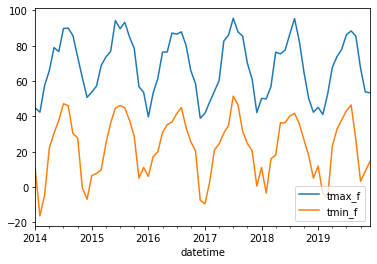

In [0]:
# temperature
temperature_precipitation[['tmax_f', 'tmin_f']].plot()

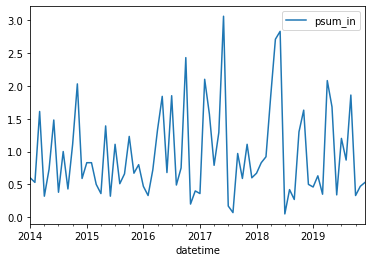

In [0]:
# precipitation
temperature_precipitation[['psum_in']].plot()